## Data 620 Project 2
### Lin Li and Tony Mai
Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter
import networkx.algorithms.bipartite as bipartite
from networkx.algorithms import community #This is part of networkx, for community detection
import pandas as pd
import csv

### Plant - pollinator network

The Web of Life project is developed at Jordi Bascompte's lab (www.bascompte.net), a research group focused on the structure and dynamics of ecological networks. It is supported by an European Research Council's Advanced Grant.

In [15]:
# load dataset
df = pd.read_csv("M_PL_021.csv")

# convert adjacency matrix to source - target format
df.columns.values[0] = 'Pollinator'
result = pd.melt(df,id_vars=['Pollinator'])
filtered = result[result['value'] == 1].rename(columns={'Pollinator': 'source', 'variable': 'target'})

# get network info
G = nx.from_pandas_edgelist(filtered)
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 768
Number of edges: 1193
Average degree:   3.1068


In [16]:
# check if network is 2-mode
nx.is_bipartite(G)

True

In [17]:
plants = list(filtered.target.unique())
pollinators = list(filtered.source.unique())

In [18]:
# project bipartite graph onto plants nodes
pla = bipartite.projected_graph(G, plants)
pla = bipartite.weighted_projected_graph(G, plants)

# project bipartite graph onto pollinators nodes
pol = bipartite.projected_graph(G, pollinators)
pol = bipartite.weighted_projected_graph(G, pollinators)

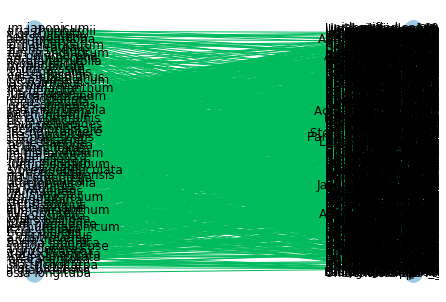

In [19]:
sub_data = filtered

edges = [tuple(x) for x in sub_data[['source','target']].values.tolist()]
B = nx.Graph()
B.add_nodes_from(sub_data['source'].unique(), bipartite=0)
B.add_nodes_from(sub_data['target'].unique(), bipartite=1)
B.add_edges_from(edges, label='value')

# Now instead of spring_layout, use bipartite_layout

# First specify the nodes you want on left or top
left_or_top = sub_data['source'].unique()

# Then create a bipartite layout
pos = nx.bipartite_layout(B, left_or_top)

# Pass that layout to nx.draw
nx.draw(B,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,
     edge_cmap=plt.cm.Blues,with_labels=True)

We use centrality measures to identify the most important nodes in the networks.

In [20]:
#density
density = nx.density(B)
density 

0.0040505486744893526

In [21]:
#calculate degree centrality
degree_centrality_pol = nx.degree_centrality(pol)
degree_centrality_pla = nx.degree_centrality(pla)

In [22]:
# Degree Centrality for pollinators
sorted_degree_centrality_pol = sorted(degree_centrality_pol.items(), key=itemgetter(1), reverse=True)
df_centrality_pol = pd.DataFrame(sorted_degree_centrality_pol, columns =['Name', 'Degree Centrality']) 
print(df_centrality_pol[:10])

# Degree Centrality for plants
sorted_degree_centrality_pla = sorted(degree_centrality_pla.items(), key=itemgetter(1), reverse=True)
df_centrality_pla = pd.DataFrame(sorted_degree_centrality_pla, columns =['Name', 'Degree Centrality']) 
print(df_centrality_pla[:10])

                    Name  Degree Centrality
0      Weigela hortensis           0.800000
1   Hydrangea paniculata           0.722222
2   Cirsium kagamontanum           0.722222
3  Hydrangea macrophylla           0.700000
4        Deutzia crenata           0.677778
5   Rabdosia trichocarpa           0.666667
6  Persicaria thunbergii           0.644444
7  Corydalis lineariloba           0.622222
8     Geranium nepalense           0.622222
9          Prunus incisa           0.577778
                         Name  Degree Centrality
0         Eristalis cerealis            0.714497
1       Lasioglossum apristum           0.665680
2  Mordellistena sp1 M_PL_021           0.649408
3   Unidentified sp1 M_PL_021           0.631657
4    Sphaerophoria menthastri           0.556213
5   Lasioglossum transpositum           0.541420
6        Graphomyia maculata            0.474852
7         Melanostoma scalare           0.470414
8   Unidentified sp2 M_PL_021           0.464497
9        Episyrphus baltea

For the pollinators network, we observed, Weigela hortensis (0.197864), Cirsium kagamontanum (0.187956), and Hydrangea paniculata (0.185056) have the highest centrality. For the plants network, we have the Eristalis cerealis(0.081857),       Lasioglossum apristum (0.081584), and Mordellistena sp1 M_PL_021 (0.081549).Betweenness centrality looks at all the shortest paths that pass through a particular node by calculating every possible shortest path in your network. It identifies important nodes not because they have a lot of connections but because they stand in between groups, giving the network connectivity and cohesion


In [23]:
# get betweenness values
# pollinators
betweenness_dict_pol = nx.betweenness_centrality(pol)
# plants
betweenness_dict_pla = nx.betweenness_centrality(pla) 

In [24]:
# betweenness centrality for pollinators network
sorted_betweenness_pol = sorted(betweenness_dict_pol.items(), key=itemgetter(1), reverse=True)
df_btw_pol = pd.DataFrame(sorted_betweenness_pol, columns =['Name', 'Betweenness Centrality']) 
print(df_btw_pol[:10])

# betweenness centrality for plant network
sorted_betweenness_pla = sorted(betweenness_dict_pla.items(), key=itemgetter(1), reverse=True)
df_btw_pla = pd.DataFrame(sorted_betweenness_pla, columns =['Name', 'Betweenness Centrality']) 
print(df_btw_pla[:10])

                    Name  Betweenness Centrality
0      Weigela hortensis                0.047831
1  Corydalis lineariloba                0.044183
2        Deutzia crenata                0.041016
3     Angelica pubescens                0.040111
4  Persicaria thunbergii                0.036556
5   Rabdosia trichocarpa                0.036187
6   Hydrangea paniculata                0.032878
7      Anthriscus aemula                0.032872
8          Prunus incisa                0.032303
9  Hydrangea macrophylla                0.031719
                         Name  Betweenness Centrality
0         Eristalis cerealis                 0.088091
1      Ceratina megastigmata                 0.052005
2       Lasioglossum apristum                0.050596
3    Sphaerophoria menthastri                0.048904
4  Mordellistena sp1 M_PL_021                0.042368
5   Unidentified sp1 M_PL_021                0.036884
6   Unidentified sp2 M_PL_021                0.027123
7   Lasioglossum transpositum

The Betweenness Centrality calculates the shortest path between every pair of nodes in a connected graph It detects the amount of influence a node has over the flow of information in a graph and can also be seen as a bridge from one part of the graph to another. For the pollinators network, Weigela hortensis is the highest. For the plant network, Eristalis cerealis is the highest and there is a noticeable gap between it and the rest.  

In [26]:
# get eigenvector centrality values 
eigen_dict_pol = nx.eigenvector_centrality(pol)
eigen_dict_pla = nx.eigenvector_centrality(pla)

In [27]:
# eigenvector values for pollinators network
sorted_eigen_pol = sorted(eigen_dict_pol.items(), key=itemgetter(1), reverse=True)
df_eigen_pol = pd.DataFrame(sorted_eigen_pol, columns =['Name', 'Eigenvector Centrality']) 

print(df_eigen_pol[:10])

# eigenvector values for plant network
sorted_eigen_pla = sorted(eigen_dict_pla.items(), key=itemgetter(1), reverse=True)
df_eigen_pla = pd.DataFrame(sorted_eigen_pla, columns =['Name', 'Eigenvector Centrality']) 
#chart_btw_W = df_btw_W.plot.bar(x='Name', y='Betweenness Centrality', rot=90)
print(df_eigen_pla[:10])

                    Name  Eigenvector Centrality
0      Weigela hortensis                0.197864
1   Cirsium kagamontanum                0.187956
2   Hydrangea paniculata                0.185056
3  Hydrangea macrophylla                0.178568
4        Deutzia crenata                0.171350
5     Geranium nepalense                0.171236
6   Rabdosia trichocarpa                0.171183
7  Persicaria thunbergii                0.168703
8  Corydalis lineariloba                0.158710
9     Astilbe thunbergii                0.152914
                         Name  Eigenvector Centrality
0         Eristalis cerealis                 0.081857
1       Lasioglossum apristum                0.081584
2  Mordellistena sp1 M_PL_021                0.081549
3   Unidentified sp1 M_PL_021                0.081346
4   Lasioglossum transpositum                0.079251
5    Sphaerophoria menthastri                0.078136
6           Andrena hikosana                 0.077487
7   Unidentified sp2 M_PL_021

A high eigenvector score means that a node is connected to many nodes who themselves have high scores. For the pollinators network we have Weigela hortensis that connects to many nodes. For the plants network we have Eristalis cerealis connecting to many other nodes. Lasioglossum apristum, Mordellistena sp1 M_PL_021, Unidentified sp1 M_PL_021 are not that far behind too.  

# Conclusion

This network have relatively low density of 0.00405. For the pollinators network, Weigela hortensis have highest degree centrality, betweenness centrality and eigenvector centrality. For the plants network, we have the Eristalis cerealis have highest degree centrality, betweenness centrality and eigenvector centrality.